# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, precision_recall_curve, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Loading and Visualizing data

There are lots of dataset listed on <a href='https://openml.org/search?type=data&sort=runs&status=active'>OpenML</a> site that can be downloaded using ```fetch_openml``` function. You can get the id or name of the dataset from there and pass in the function like ```fetch_openml (data_id = <id_num>)``` and it'll automatically download and load it for you

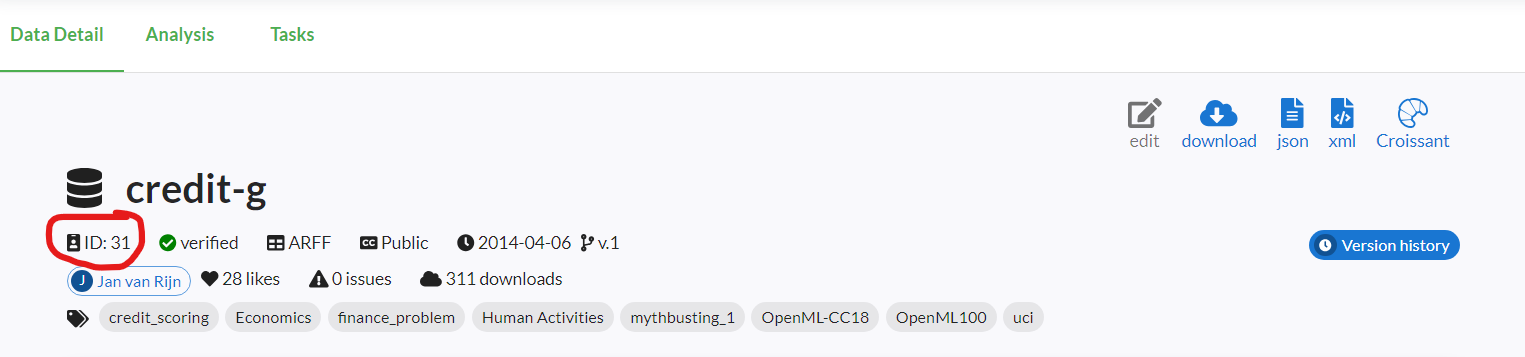

In [2]:
mnist = fetch_openml('mnist_784')
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
X, y = mnist.data.to_numpy(), mnist.target.to_numpy()
print(X.shape, y.shape)

(70000, 784) (70000,)


In [7]:
X_train_valid, X_test, y_train_valid, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(f'Shape of Train Data: {X_train_valid.shape}')
print(f'Shape of Test Data: {X_test.shape}')

Shape of Train Data: (60000, 784)
Shape of Test Data: (10000, 784)


__NOTE:__ Before Starting any task always split your dataset into train, valid and test set. There are different functions in sklearn for it, I will create a valid dataset to demonstrate how to use it

In [8]:
valid_size = 0.2
indices = list(range(len(X_train_valid)))
train_indices, valid_indices = train_test_split(indices, test_size=valid_size, shuffle=True)
print(f'Number of Training Instances: {len(train_indices)}')
print(f'Number of Valid Indices: {len(valid_indices)}')

Number of Training Instances: 48000
Number of Valid Indices: 12000


In [9]:
X_train, y_train = X_train_valid[train_indices], y_train_valid[train_indices]
X_valid, y_valid = X_train_valid[valid_indices], y_train_valid[valid_indices]

print(f'For Train Dataset: {X_train.shape}, {y_train.shape}')
print(f'For Train Dataset: {X_valid.shape}, {y_valid.shape}')

For Train Dataset: (48000, 784), (48000,)
For Train Dataset: (12000, 784), (12000,)


What can be a possible problem with this splitting approach?

In [10]:
valid_size = 0.2
indices = list(range(len(X_train_valid)))
train_indices, valid_indices = train_test_split(indices, test_size=valid_size, shuffle=True, random_state=42)
print(f'Number of Training Instances: {len(train_indices)}')
print(f'Number of Valid Indices: {len(valid_indices)}')
X_train, y_train = X_train_valid[train_indices], y_train_valid[train_indices]
X_valid, y_valid = X_train_valid[valid_indices], y_train_valid[valid_indices]

print(f'For Train Dataset: {X_train.shape}, {y_train.shape}')
print(f'For Train Dataset: {X_valid.shape}, {y_valid.shape}')

Number of Training Instances: 48000
Number of Valid Indices: 12000
For Train Dataset: (48000, 784), (48000,)
For Train Dataset: (12000, 784), (12000,)


Anything else that can be problematic here?

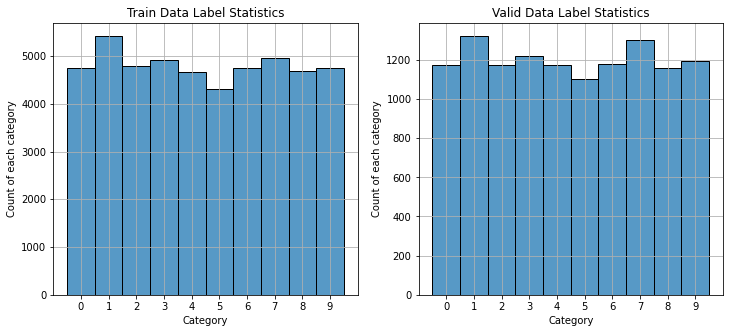

In [11]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.histplot(sorted(y_train))
plt.xlabel('Category')
plt.ylabel('Count of each category')
plt.title('Train Data Label Statistics')
plt.grid(True)
plt.subplot(122)
sns.histplot(sorted(y_valid))
plt.xlabel('Category')
plt.ylabel('Count of each category')
plt.title('Valid Data Label Statistics')
plt.grid(True)

In [12]:
valid_size = 0.2
indices = list(range(len(X_train_valid)))
train_indices, valid_indices = train_test_split(indices, test_size=valid_size, shuffle=True, random_state=42, stratify=y_train_valid)
print(f'Number of Training Instances: {len(train_indices)}')
print(f'Number of Valid Indices: {len(valid_indices)}')
X_train, y_train = X_train_valid[train_indices], y_train_valid[train_indices]
X_valid, y_valid = X_train_valid[valid_indices], y_train_valid[valid_indices]

print(f'For Train Dataset: {X_train.shape}, {y_train.shape}')
print(f'For Train Dataset: {X_valid.shape}, {y_valid.shape}')

Number of Training Instances: 48000
Number of Valid Indices: 12000
For Train Dataset: (48000, 784), (48000,)
For Train Dataset: (12000, 784), (12000,)


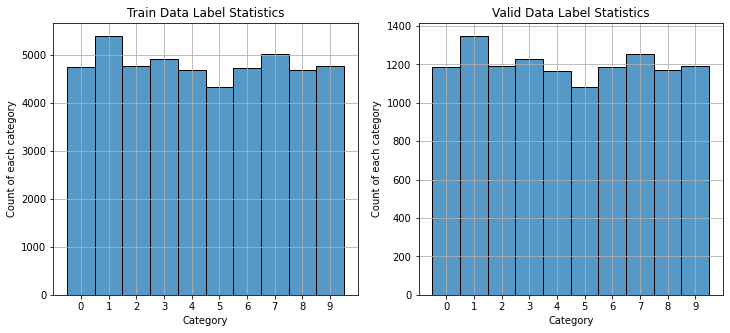

In [13]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.histplot(sorted(y_train))
plt.xlabel('Category')
plt.ylabel('Count of each category')
plt.title('Train Data Label Statistics')
plt.grid(True)
plt.subplot(122)
sns.histplot(sorted(y_valid))
plt.xlabel('Category')
plt.ylabel('Count of each category')
plt.title('Valid Data Label Statistics')
plt.grid(True)

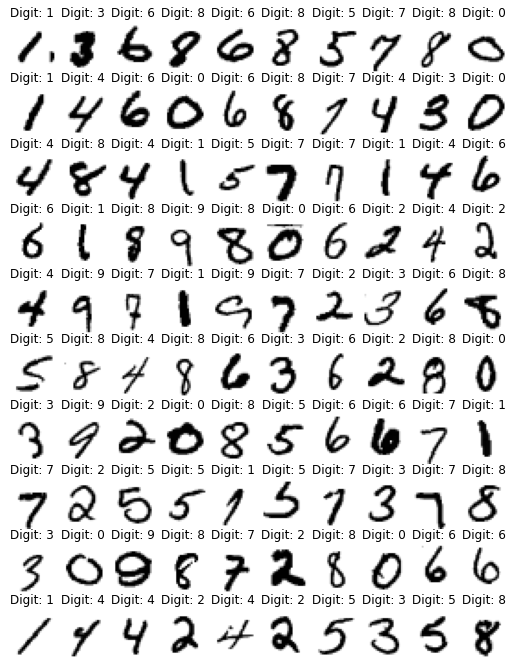

In [14]:
# Data Visualization
plt.figure(figsize=(9, 12))
for idx, image_data in enumerate(X_train[:100]):
    plt.subplot(10, 10, idx + 1)
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.title(f'Digit: {y_train[idx]}')
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# Model Building

## Binary Classification

In [15]:
y_train_8 = (y_train == '8') 
y_valid_8 = (y_valid == '8')
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)
y_train_pred = sgd_clf.predict(X_train)
y_valid_pred = sgd_clf.predict(X_valid)

In [16]:
print(f'Accuracy of the model on Train Set: {accuracy_score(y_train_8, y_train_pred)*100:.2f}%')

Accuracy of the model on Train Set: 94.25%


In [17]:
print(f'Accuracy of the model on valid Set: {accuracy_score(y_valid_8, y_valid_pred)*100:.2f}%')

Accuracy of the model on valid Set: 94.05%


So it is around 94% that's great but is it?

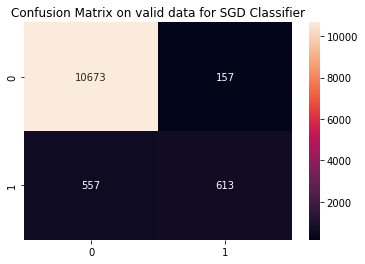

In [18]:
conf_mat = confusion_matrix(y_valid_8, y_valid_pred)
sns.heatmap(conf_mat, fmt = '.0f', annot=True)
plt.title('Confusion Matrix on valid data for SGD Classifier')
plt.show()

So many 8s (almost 557) are incorrectly classified, so why is it accuracy so high? What will be the accuracy to a complete random classifier? What other metric can be used to quantify how our model is performing?

Reference: Wikipedia

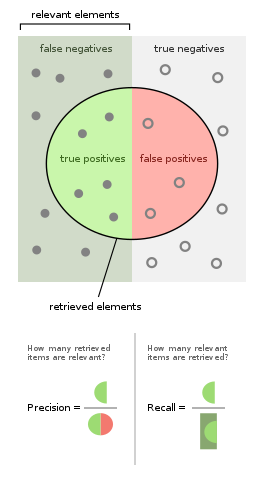

In [19]:
print(f'Precision Score: {precision_score(y_valid_8, y_valid_pred):.4f}')
print(f'Recall Score: {recall_score(y_valid_8, y_valid_pred):.4f}')

Precision Score: 0.7961
Recall Score: 0.5239


Recall is 0.52 whereas precision is 0.79 what should be trusted more?

In [20]:
print(f'F1 Score: {f1_score(y_valid_8, y_valid_pred):.4f}')

F1 Score: 0.6320


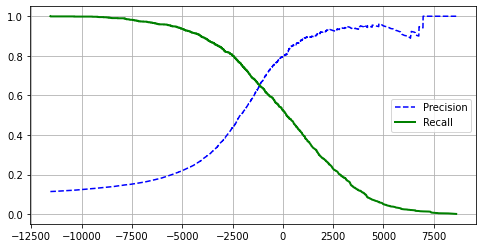

In [21]:
y_valid_scores = sgd_clf.decision_function(X_valid)
precisions, recalls, thresholds = precision_recall_curve(y_valid_8, y_valid_scores)
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend()
plt.grid(True)
plt.show();

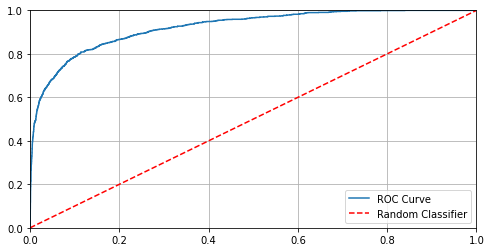

In [22]:
fpr, tpr, thresholds = roc_curve(y_valid_8, y_valid_scores)
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], 'r--', label = "Random Classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.grid(True)
plt.show();

In [25]:
print(f'ROC-AUC Score: {roc_auc_score(y_valid_8, y_valid_pred):.4f}')

ROC-AUC Score: 0.8283


__Try Yourself:__ Try out Logistic Regression and its performance measure. Make Decision what metric you would use and try to optimize it.

## Multiclass Classification

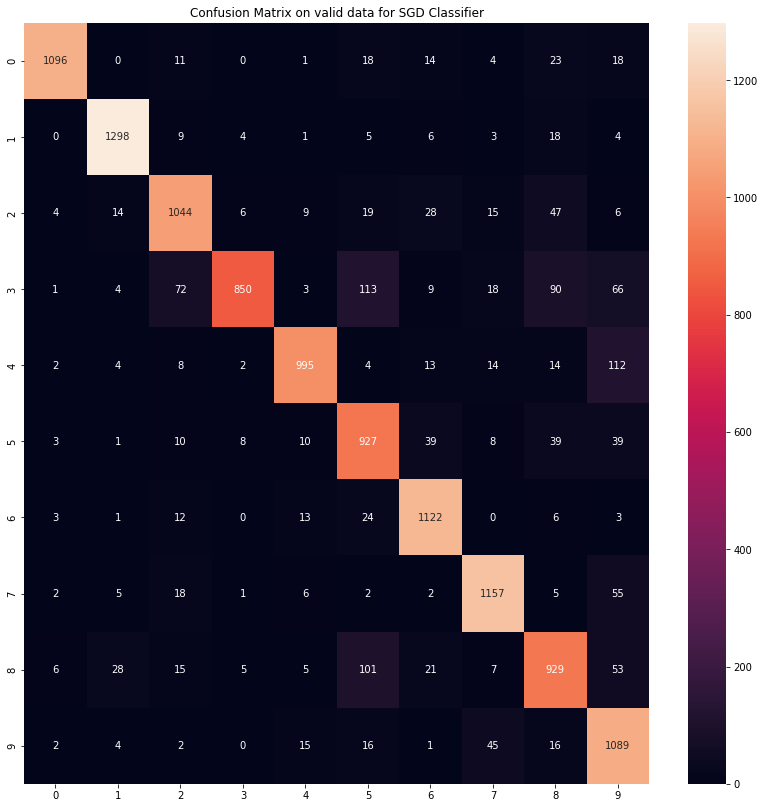

In [23]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_valid_pred = sgd_clf.predict(X_valid)
conf_mat = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(14,14))
sns.heatmap(conf_mat, fmt = '.0f', annot=True)
plt.title('Confusion Matrix on valid data for SGD Classifier')
plt.show()

e:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


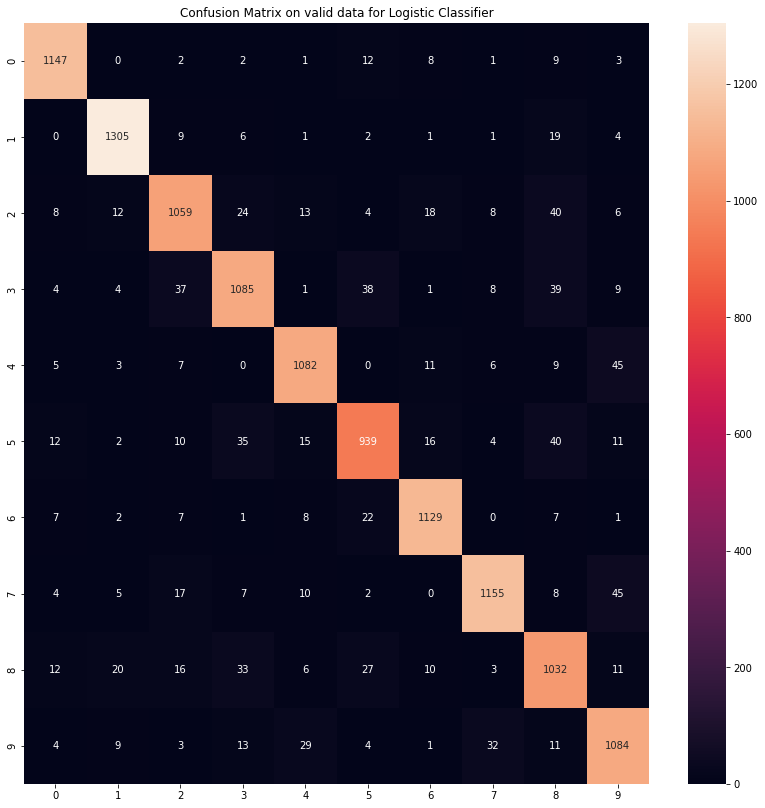

In [24]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)
y_valid_pred = logistic.predict(X_valid)
conf_mat = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(14,14))
sns.heatmap(conf_mat, fmt = '.0f', annot=True)
plt.title('Confusion Matrix on valid data for Logistic Classifier')
plt.show()

__NOTE:__ You can use <a href='https://docs.rapids.ai/api/cuml/stable/'> Rapids </a> library which uses gpu for machine learning algorithms.

Refer to this <a href='https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb'> jupyter notebook </a> to learn more.

Additional Exercises:

- Try Scaling the features and see if it lead to better performance
- Try out different classifier from sklearn and find their performance
- Find out which can work with multiclass classification and which classifiers can't (If the classifier can't, find out whether it uses OvO or OvR strategy)
- Try to code the different classification from scratch
- Try to add more computer vision related features like histogram, HoG, etc. and see the performance (Refer to: <a href = "https://lilianweng.github.io/posts/2017-10-29-object-recognition-part-1"/> Blog </a> to find what features can be used in computer vision)